In [1]:
import segment
import torch
import util
import os

#Parameters initialization and model download
## If you're running on cpu please consider to change stride value to 4, this will invoke lower resolution but faster running time

In [2]:
################################################################################
# Mode
################################################################################
# mode == 0 Single stage segmentation
# mode == 1 Two stage segmentation for foreground
# mode == 2 Two stage segmentation on background and foreground
mode = 0
################################################################################
# GNN parameters
################################################################################
# Numbers of epochs per stage [mode0,mode1,mode2]
epochs = [10, 100, 15]
# Number of steps per image
step = 1
# Number of clusters
K = 2
################################################################################
# Processing parameters
################################################################################
# Show only largest component in segmentation map (for k == 2)
cc = False
# apply bilateral solver
bs = False
# Apply log binning to extracted descriptors (correspond to smoother segmentation maps)
log_bin = False
################################################################################
# Descriptors extraction parameters
################################################################################
# Directory to pretrained Dino
pretrained_weights = './dino_deitsmall8_pretrain_full_checkpoint.pth'
# Resolution for dino input, higher res != better performance as Dino was trained on (224,224) size images
res = (224, 224)
# stride for descriptor extraction
stride = 8
# facet fo descriptor extraction (key/query/value)
facet = 'key'
# layer to extract descriptors from
layer = 11
################################################################################
# Data parameters
################################################################################
# Directory of image to segment
in_dir = './images/single/'
out_dir = './results'
save = False
################################################################################
# Check for mistakes in given arguments
if K != 2 and cc:
    print('largest connected component only available for k == 2')
    exit()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# If Directory doesn't exist than download
if not os.path.exists(pretrained_weights):
    url = 'https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_pretrain/dino_deitsmall8_pretrain_full_checkpoint.pth'
    util.download_url(url, pretrained_weights)

Single Object Segmentation

  0%|          | 0/1 [00:00<?, ?it/s]/Users/amitaflalo/Desktop/gnn/gnn_pool.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  S = F.softmax(H)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


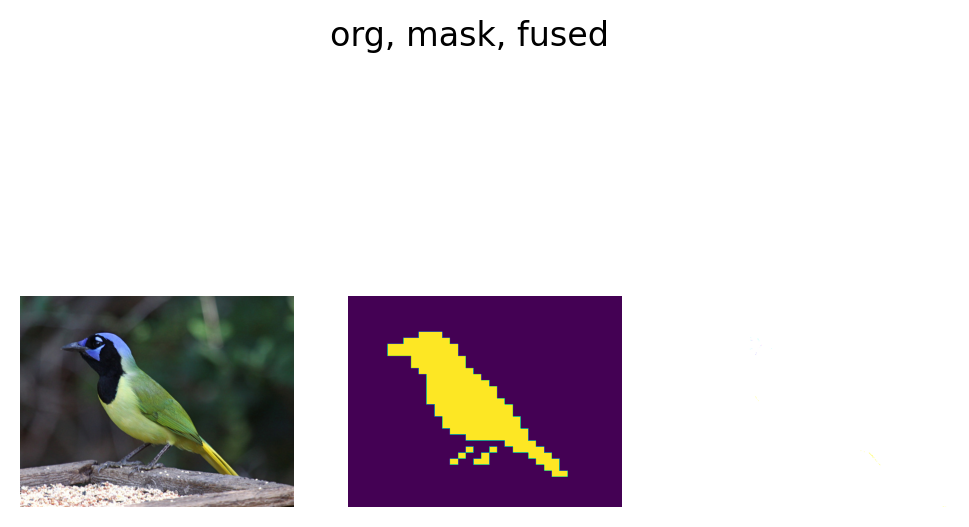

100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


In [3]:
segment.GNN_seg(mode, epochs, K, pretrained_weights, in_dir, out_dir, save, cc, bs, log_bin, res, facet, layer, stride,
        device)

# Let's apply bilateral solver to get more accurate segmentation

In [ ]:
bs = True
segment.GNN_seg(mode, epochs, K, pretrained_weights, in_dir, out_dir, save, cc, bs, log_bin, res, facet, layer, stride,
        device)

# Let's apply semantic segmentation to the foreground object using 2-step process.
First find the foreground object and then apply the Segmentation algorithm recursive
on the foreground object, allows for more detailed segmentation (details in the paper)

In [ ]:
bs = False
mode = 1
K = 4
segment.GNN_seg(mode, epochs, K, pretrained_weights, in_dir, out_dir, save, cc, bs, log_bin, res, facet, layer, stride,
        device)

Let's apply semantic segmentation to the background and foreground objects with 2-step method

  0%|          | 0/1 [00:00<?, ?it/s]/Users/amitaflalo/Desktop/gnn/gnn_pool.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  S = F.softmax(H)


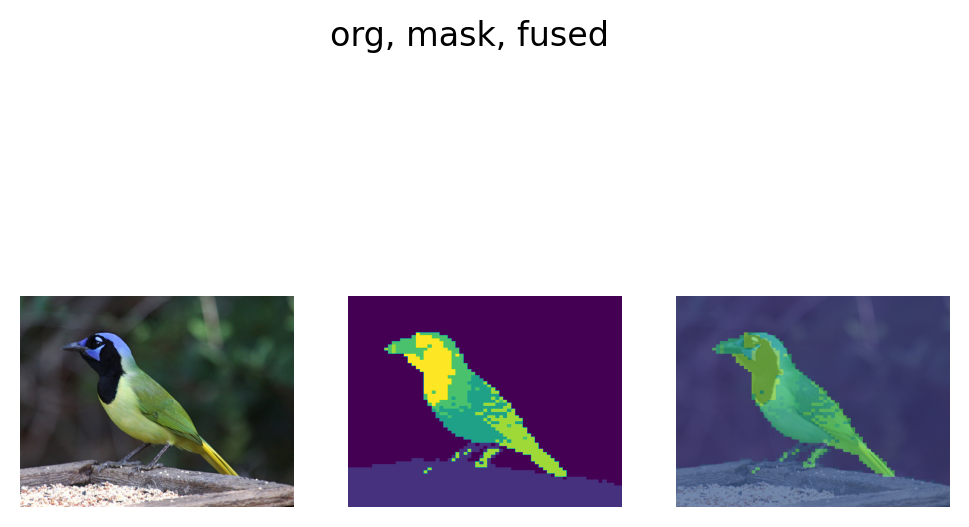

100%|██████████| 1/1 [01:27<00:00, 87.02s/it]


In [3]:
mode = 2
K = 4
segment.GNN_seg(mode, epochs, K, pretrained_weights, in_dir, out_dir, save, cc, bs, log_bin, res, facet, layer, stride,
        device)

#Let's look on more birds: 👊

In [ ]:
in_dir = './images/birds'
segment.GNN_seg(mode, epochs, K, pretrained_weights, in_dir, out_dir, save, cc, bs, log_bin, res, facet, layer, stride, device)